<center><font size="+2">Introduction to Programming and</font></center>
<center><font size="+2">Data Processing in Python 2020/2021</font></center>
<br/>
<center><font size="+1">Core course, PhD program in Computer Science</font></center>
<center><font size="+1">GSSI Gran Sasso Science Institute, L'Aquila, Italy</font></center><br/>

<center><font size="+2">Course responsibles</font></center>
<center><font size="+1"><a href="https://www.linkedin.com/in/daniele-licari">Daniele Licari</a> &nbsp; d.licari@santannapisa.it</font></center>
<center><font size="+1">
    &nbsp;&nbsp;
    <a href="https://www.santannapisa.it/en/andrea-vandin">Andrea Vandin</a> &nbsp; a.vandin@santannapisa.it</font></center>

---
---

<center><font size="+2">Part 2</font></center>
<center><font size="+1">Breast Cancer Diagnosis 2</font></center>
<center><font size="+1">Overview of supervised learning</font></center>

---
---

**This notebook provides an overview of supervised learning pipeline**

   * use Scikit-learn library package for classification task
   * understand metrics of classification performance evaluation
   * demonstrate the problem of model overfitting.
   * tune the hyperparameters and model validation

This notebook presents Python programming examples for machine learning supervised: splitting data, predictive models, decision boundary, evaluation, cross-validation, hyperparameters tuning.  
You can find more details in the *APPENDIX* of this document.

**References** 
This notebook is mainly based on the following books:

* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-data-science/9781491912126/)
* [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks)
* [Introduction to Data Mining (2nd Edition), Pang-Ning Tan et al.](https://www.cse.msu.edu/~ptan/)
* [Statistics and Machine Learning in Python, E.Duchesnay, T.Löfstedt, F.Younes](ftp://ftp.cea.fr/pub/unati/people/educhesnay/pystatml/StatisticsMachineLearningPythonDraft.pdf)
* [Introduction to Machine Learning Algorithms, KNIME AG](https://www.knime.com/knime-course-material-download-page)

Some pictures have been taken from these sources. 
This notebook has been created by Daniele Licari and further elaborated by Andrea Vandin.

Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.

# A visual introduction to supervised machine learning
Supervised learning models tries to learn the relationship between measured features X of data and some labels y associated with the data; The learning algorithm adjusts (learns) the model parameters throughout a number of iterations to maximize/minimize a likelihood/error function on output. Once this model is determined, it can be used to apply labels to new, unknown data. This is further subdivided into:
  - *Classification* tasks, the labels are discrete categories
  - *Regression* tasks, the labels are continuous quantities. 

The following interactive example was written by Stephanie and Tony on R2D3. we will create a machine learning model to distinguish homes in New York from homes in San Francisco. 

It introduces you to the decision boundary, decision tree, test model, and overfitting.


In [293]:
from IPython.display import display, HTML,IFrame 
IFrame(src="http://www.r2d3.us/visual-intro-to-machine-learning-part-1/", width=1200, height=650)

# Classification of Benign and Malignant Breast Cancer 
We will first take a look at a simple classification task, features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

<img src="img/Breast-Biopsy-2.jpg" >

**Attribute Information**
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

**Classification Task**

We want predict the benign or malignant breast cancer using machine learning 

**Diagnosis Class:**
* malignant
* benign

![alt text](img/fna-benign1.png)
![alt text](img/fna-malignant1.png)

This dataset is also available via the ftp server UW CS: http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/

## Load libraries

In [13]:
# Data Processing libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualizzation libs
# keeps the plots in one place. calls image as static pngs
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
from IPython.display import display, Markdown # display Markdown code using Python
import seaborn as sns # data visualization library based on matplotlib

from warnings import filterwarnings
filterwarnings('ignore')

## Load data
Let's load preprocessed data by the Part 1 into Pandas, and get *Features matrix* and *Target array*

In [14]:
#load dataset, we will first load the data into a Pandas DataFrame object and display its content

data = pd.read_csv('data/WBCD_preprocessed.csv', index_col=0)
df_X = data.iloc[:,:-1] # Features matrix
df_y = data.iloc[:,-1] # Target array
data.head()

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,texture error,smoothness error,...,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.9053,0.006399,...,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.7339,0.005225,...,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7869,0.006150,...,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
4,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7813,0.011490,...,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant
5,15.70,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.8902,0.007510,...,0.02165,0.005082,23.75,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,malignant


In [5]:
# Encode target labels with value 1 for malignant and 0 for benign
dict_lb_to_num = {'malignant':1, 'benign':0} # set malignat as true class
df_y = df_y.replace(dict_lb_to_num)
df_y.value_counts()

0    352
1    205
Name: target, dtype: int64

## Splitting Data
**We would like to evaluate the model on data it has not seen before**, and so we will split the data into a training set and a testing set. 
1. *Training dataset*: Dataset used to fit the model (set the model parameters like weights).
2. *Test dataset (holdout set)*: Dataset (hold-out) used to provide an unbiased evaluation of a final model fit on the training dataset. 

we hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance. 

![](img/splitting_1.png)

**We usually split the data around 70%-30% (or 80%-20%) between training and testing sets.**



<img src='img/training_2.jpg' width='500px'>

Some classification problems can present a large imbalance in the distribution of target classes. **It is important to have the same data distribution across test and training set.**
In such cases it is recommended to use **stratified sampling** to ensure that relative class frequencies is approximately on both sets.

0    0.631957
1    0.368043
Name: target, dtype: float64

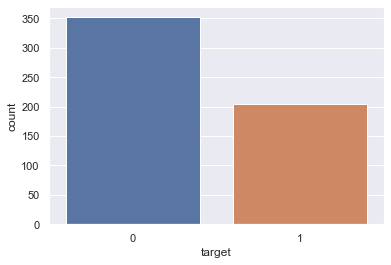

In [12]:
df_y.value_counts()


[*sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):
Split arrays or matrices into random train and test subsets

N. Training sample 389
N. Testing sample 168


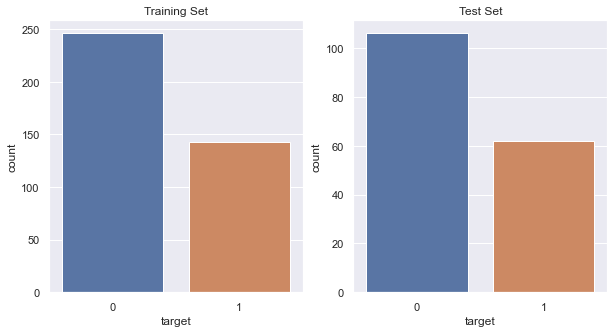

In [6]:
from sklearn.model_selection import train_test_split

# data is splitted 70%-30% in a stratified method on the class labels. 
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size =.3, stratify=df_y, random_state=1) 

print(f"N. Training sample {len(X_train)}")
print(f"N. Testing sample {len(X_test)}")

# plot target distributions of test and training set
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
ax = sns.countplot(y_train.sort_values())   
ax.set_title("Training Set")
plt.subplot(1, 2, 2)
ax = sns.countplot(y_test.sort_values()) 
ax.set_title("Test Set")
plt.show()


### Scaling
we use the StandardScaler:
* *StandardScaler.fit_transform()* on train set to learn the parameters of scaling on the train data and scale data.
* *StandardScaler.transform()* on test set to scale data based on the  scaling paramaters learned on the train data 

**Our models do not have to rely on parameters learned from the test set**

Including the test dataset in the transform computation will allow information to flow from the test data to the train data and therefore to the model that learns from it, thus allowing the model to cheat (introducing a bias).

In [7]:
from sklearn.preprocessing import StandardScaler #for Scaling the features

sc = StandardScaler()
X_train = sc.fit_transform(X_train) # computes variance and mean of each feature and scaling. 
X_test  = sc.transform(X_test)  # scales the test data.

## Decision Tree
The basic recipe for applying a supervised machine learning model:
1. Choose a class of model

 ~~2. Choose best model hyperparameters ~~(we will see later)
3. Fit the model to the training data
4. Use the model to predict labels for new data

[Sklearn contains several supervised machine learning models](https://scikit-learn.org/stable/supervised_learning.html).
We use a Decision Tree Classifier which predicts the value of a target variable by learning simple decision rules (if-then-else) inferred from the data features

In [306]:
from sklearn.tree import DecisionTreeClassifier
# 1. instantiate model
model = DecisionTreeClassifier(random_state=42) 
# 2. fit model to data (training)
model.fit(X_train, y_train)   
# 3. predict on new data 
y_pred = model.predict(X_test)             
y_pred[:10]

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

## Metrics of classification performance evaluation
Let's draw the decision boundary of Decision Tree Classifier trained on the training set

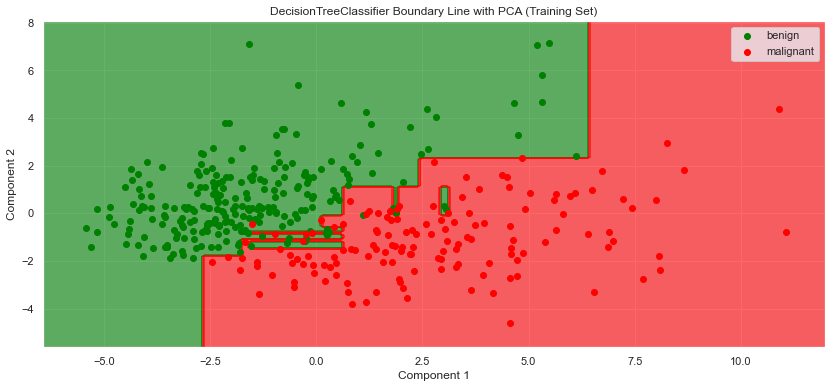

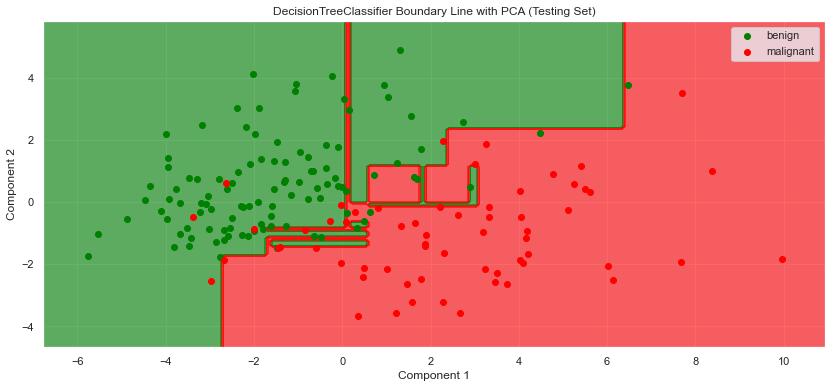

In [307]:
from src.utils import draw_boundary
# draw decision boundary for visualization (and teaching) purpose
draw_boundary(DecisionTreeClassifier(random_state = 42),  X_train, X_test, y_train, y_test)

Figure above shows what happened when we added new data to the model (Testing set). It turned out that the model did not fit well with the new data. Notice that the model misclassified some of the new data.


We can use the following metrics:
- *True Positive (TP)*  : Malignant cancer correctly identified as Malignant
- *True Negative (TN)*  : Benign cancer correctly identified as Benign
- *False Positive (FP)* : Benign cancer incorrectly identified as  Malignant
- *False Negative (FN)* : Malignant cancer incorrectly identified as Benign

The four outcomes can be formulated in a 2×2 confusion matrix

![](img/confusion_matrix.png)

* *Accuracy (ACC)*: (TP + TN) / (TP + FP + FN + TN)
* *Sensitivity (SEN)* or Recall of the positive class or true positive rate (TPR) or hit rate: SEN = TP / P = TP / (TP+FN)
* *Specificity (SPC)* or recall of the negative class or true negative rate: SPC = TN / N = TN / (TN+FP)
* *Precision* or positive predictive value (PPV): PPV = TP / (TP + FP)

In addition, *F1 Score* (or F-score) which is the harmonic mean of the precision and recall is usefull to deal with imballaced datasets.
* *F1 = 2 * (precision * recall) / (precision + recall)*

**Note**: Intuitively, precision (on positive class) is the ability of the classifier not to label as positive a sample that is negative, and recall (on positive class) is the ability of the classifier to find all the positive samples (TPR).


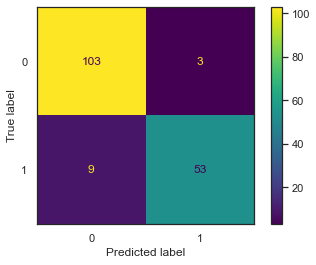

In [216]:
from sklearn.metrics import plot_confusion_matrix, classification_report
sns.set(style="white")
plot_confusion_matrix(model, X_test, y_test) 
plt.show()

In [217]:
# Building a text report showing the main classification metrics.
print('='*20,'Training Set Results','='*20)
print(classification_report(y_train, model.predict(X_train)))

print('='*20,'Testing Set Results','='*20)
report_testing_dtree = classification_report(y_test, y_pred)
print(report_testing_dtree)
print('='*60)

==================== Training Set Results ====================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00       143

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389

==================== Testing Set Results ====================
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       106
           1       0.95      0.85      0.90        62

    accuracy                           0.93       168
   macro avg       0.93      0.91      0.92       168
weighted avg       0.93      0.93      0.93       168



[sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) Text summary of the precision, recall, F1 score for each class. 
The support is the number of occurrences of each class in y_test.
The reported averages include macro average (averaging the unweighted mean per label) and weighted average (averaging the support-weighted mean per label)



**In our case, the value of Recall of positive class (SEN) is considered a primary value, as the goal is to identify all cases of really positive (malignant tumor) minimizing false negative (e.g. I predict benign tumor but the patient has a malignant tumor)**. The malignant '1' tumors have positive class and those benign '0' negative class.
False positive (Malignant cancer incorrectly identified as Benign) can be identified by further investigation by doctors.

## Random Forest

`The anecdote of the Wisdom of the crowd.` **At a 1906 country fair in Plymouth, 800 people participated in a contest to estimate the weight of an ox. Anybody won the contest, but the statistician Francis Galton observed that the median guess, 1207 pounds, was accurate within 1% of the true weight of 1198 pounds.**

In ensemble learning theory, we combine several weak learners (or base models) models in order to create a strong learner (or ensemble model) that achieves better performances (generalize well from the training data).

[Random forests or random decision forests](https://scikit-learn.org/stable/modules/ensemble.html#forest) are an ensemble learning method for classification (or regression) that operate **by constructing a multitude of random decision trees** (decision trees are created using a subset of the input feature) at training time and **outputting the class that is the mode of the classes** (classification) or mean prediction (regression) of the individual trees. 
 
![](img/Random_forest_diagram_complete.png)




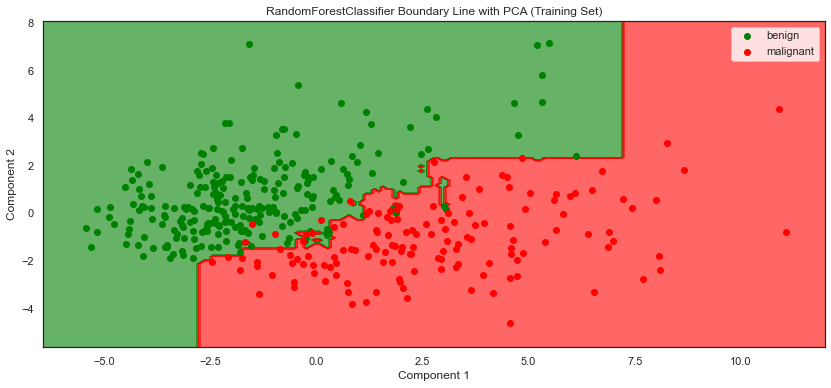

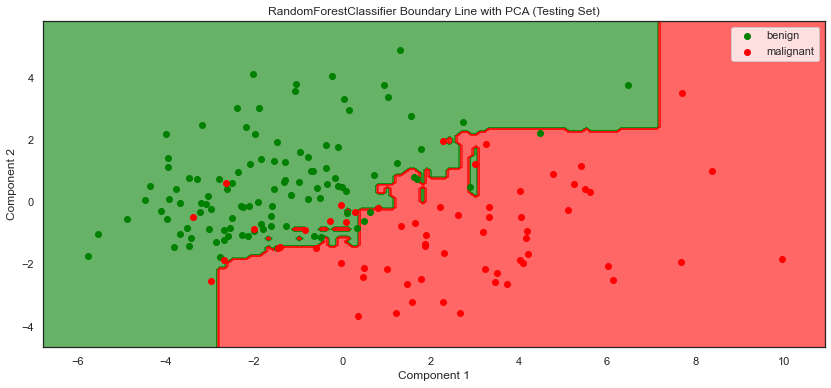

==================== Testing DECISION TREE Results ====================
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       106
           1       0.95      0.85      0.90        62

    accuracy                           0.93       168
   macro avg       0.93      0.91      0.92       168
weighted avg       0.93      0.93      0.93       168

==================== Testing RANDOM FOREST Results ====================
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       106
           1       0.98      0.85      0.91        62

    accuracy                           0.94       168
   macro avg       0.95      0.92      0.93       168
weighted avg       0.94      0.94      0.94       168



In [218]:
from sklearn.ensemble import RandomForestClassifier

# 1. instantiate model Random Forest with 50 decision trees
model = RandomForestClassifier(n_estimators=50,random_state=42) 
# 2. fit model to data
model.fit(X_train, y_train)   
# 3. predict on new data
y_pred = model.predict(X_test)    

# drawing decision boundary  
draw_boundary(RandomForestClassifier(n_estimators=50,random_state=42) ,  X_train,X_test,y_train,y_test )

# 4. Evaluation (Comparison with decision tree model)
print('='*20,'Testing DECISION TREE Results','='*20)
print(report_testing_dtree)

print('='*20,'Testing RANDOM FOREST Results','='*20)
print(classification_report(y_test, y_pred))
print('='*60)

**Note**: In Random Forest, multiple overfitting estimators can be combined to reduce the overfitting effect and find a better classification

Since our model does not have huge data set, testing set is left with few observations to lead any real conclusion.

## Cross validation

One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. In the previous case, the 30% of the dataset does not contribute to the training of the model! This is not optimal, and can cause problems especially if the initial set of training data is small.
One way to address this is to use [Cross-Validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)).

**Cross-Validation scheme randomly divides the set of observations into 𝐾 groups, or folds, of approximately equal size and perform the analysis on one subset ( K-1 folds, called the training set), and validating the analysis on the other subset (1 fold, called the validation set or testing set)
To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions, and the validation results are combined (e.g. averaged) over the rounds to give an estimate of the model's predictive performance.**

Visually, it might look something like this:

<img src='img/1280px-K-fold_cross_validation_EN.png' >


It recommended to use cross-validation scheme to estimate the global predictive power of a learning algorithm. 





We will use [*StratifiedKFold()*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html?highlight=stratifiedkfold#sklearn.model_selection.StratifiedKFold) which is a variation of k-fold which returns stratified folds. 

<img src='img/stratifiedKFold.png'>

The [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function:
* allows specifying multiple metrics for evaluation.
* returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

In [219]:
from sklearn.model_selection import cross_validate

def cv_scores(model, xvalues, yvalues ):
    """
    Evaluate metric(s) by cross-validation 
    Return CV scores and scores of the model for each run of the cross validation.
    """

    # for the complete metrics:  https://scikit-learn.org/stable/modules/model_evaluation.html
    scoring=('recall','precision','accuracy', 'f1') # accuracy,recall, precision, f1 on positive class 
    # cross_validate uses Stratified 5 folds (80%-20% splitting data) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    cv_results = cross_validate(model, xvalues, yvalues, cv=5, return_train_score=True, scoring=scoring)
    
    # Folds scores
    df_folds = pd.DataFrame(cv_results)    
    # CV scores
    df_cv_scores = df_folds[sorted(cv_results.keys())].mean()
    df_cv_scores['model'] = type(model).__name__
    
    return  df_cv_scores, df_folds



In [324]:
X = df_X.values  # Features matrix
y = df_y.values # target array
estimator = DecisionTreeClassifier(random_state=42)
df_dtree_cv, _ = cv_scores(estimator,X,y)
df_dtree_cv

fit_time                         0.005599
score_time                       0.004202
test_accuracy                    0.924630
test_f1                          0.896649
test_precision                   0.902213
test_recall                      0.892683
train_accuracy                   1.000000
train_f1                         1.000000
train_precision                  1.000000
train_recall                     1.000000
model              DecisionTreeClassifier
dtype: object

Decision tree model is an over fit. There are big differences between training scores and testing scores.

In [325]:
estimator = RandomForestClassifier(n_estimators=50,random_state=42)
df_rf_cv, _  = cv_scores(estimator,X,y)
df_rf_cv

fit_time                         0.127398
score_time                       0.012199
test_accuracy                    0.953346
test_f1                          0.934836
test_precision                   0.961639
test_recall                      0.912195
train_accuracy                   1.000000
train_f1                         1.000000
train_precision                  1.000000
train_recall                     1.000000
model              RandomForestClassifier
dtype: object

Random Forest Classifier mitigates the overfitting problem reducing the difference between training and testing scores.

In [222]:
# Test scores comparison
df_cv_scores = pd.DataFrame([df_dtree_cv,df_rf_cv])
df_cv_scores[['model','test_accuracy','test_f1','test_precision','test_recall']].style.background_gradient(cmap='Blues')

,model,test_accuracy,test_f1,test_precision,test_recall
0,DecisionTreeClassifier,0.924630,0.896649,0.902213,0.892683
1,RandomForestClassifier,0.953346,0.934836,0.961639,0.912195


# Model Tuning 


Overfitting is caused by making a model more complex than necessary.

![](img/overfitting.jpg)

The Model's ability to generalize to new data is based on factors such as:
- the complexity of the model
- the model's performance on training data respect on test set

We must find the trade-off between fitting our data well, but also fitting the data as simply as possible. 

![](img/validation.png)

 
<!-- In first article of Stephanie and Tony on R2D3, we created a model that distinguishes homes in San Francisco from those in New York. In the [second article](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/), they will talk about tuning and the Bias-Variance tradeoff. -->

In the previous section, we saw the basic recipe for applying a supervised machine learning model. Now we can complete the recipe by adding Hyperparameters tuning to deal with the overfitting problem:
1. Choose a class of model
2. **Choose best model hyperparameters**
3. Fit the model to the training data
4. Use the model to predict labels for new data

In machine learning, a hyperparameter is a parameter whose value is used to control the learning process and complexity of the model. 

<!-- The choice of model and choice of hyperparameters are the most important part of using these tools and techniques effectively. -->
In order to make an informed choice, we need a way to validate that our model and our hyperparameters are a good fit to the data.
To do this, **we need to retain some subset of training data (validation set) to evaluate the performance of the model to changes in its hyperparameters.**

<!-- ![](img/splitting_validation.png) -->
<img src='img/splitting_validation.png' width='800px'>

As we have seen before, one disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. This is not optimal, and can cause problems especially if the initial set of training data is small.  Thus, to overcome this, cross validation of 5 fold is performed to validate the result.

<!-- ![](notebook/img/splitting_2.png) -->
<img src='img/splitting_2.png' width='700px'>
<!-- **Why do we need a validation set?**

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. 


 -->

## Validation Curve

**Decision-tree learners can create over-complex trees that do not generalise the data well**. This is called overfitting. 

Mechanisms such as pruning, **setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.**
[Pruning](https://en.wikipedia.org/wiki/Decision_tree_pruning) reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.

<!-- --Bias is the difference between the Predicted Value and the Expected Value
--The Variance is when the model takes into account the fluctuations in the data i.e. the noise as well. -->

We can use the [*min_samples_leaf*](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) tunable parameter to tune the decision tree model complexity and [sklearn.model_selection.validation_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve) to plot the influence of a single hyperparameter on the training score and the validation score in order to find out whether the estimator is overfitting or underfitting for some hyperparameter values.



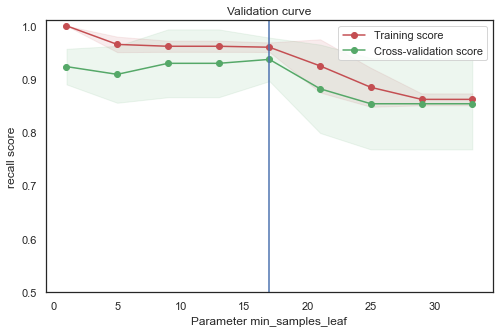

In [326]:
from src.utils import validation_curve_model
dtree =  DecisionTreeClassifier(random_state = 42)

param_range = range(1,34,4) 
param_name="min_samples_leaf"
ylim=[0.50, 1.01]


sns.set(style="white")
validation_curve_model(X_train,y_train, dtree, param_name, param_range, cv=5, ylim=ylim )

plt.show()

The chart above  is validation curve, and we see the following essential features:
* The training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
* **For very high model complexity (a high-variance model, min_samples_leaf value from 1 to 13), the training data is overfit**, which means that the model predicts the training data very well, but fails for any previously unseen data.
* **For very low model complexity (a high-bias model, min_samples_leaf value after 20), the training data is underfit**, which means that the model is a poor predictor both for the training data and for any previously unseen data.
* For some intermediate value, **the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance is 17**

## Grid Search
 In practice, models generally have more than one knob to turn, and thus plots of
validation  curves change from lines to multidimensional surfaces. 

Grid Search tries all the possible combinations of parameter values (knobs to turn) which are evaluated using CV and the best combination is retained.


<img src='img/grid_search.png' width='400' />

In [317]:

print({"min_samples_leaf": list(range(1,30,2)), # len = 15
        "min_samples_split":list(range(2,8,1)), # len = 6
        "max_depth": list(range(1,20,2)) # len = 10
       })
# all possibile combinations = 15 * 10 * 6 = 900 

{'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'min_samples_split': [2, 3, 4, 5, 6, 7], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}


[*sklearn.model_selection.GridSearchCV*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html): Exhaustive search over specified parameter values for an estimator.

In [327]:
dtree =  DecisionTreeClassifier(random_state = 42)

parameters_grid={"min_samples_leaf": range(1,30,2),
                 "min_samples_split":range(2,8,1),
                 "max_depth": range(1,20,2)
               }
 
from sklearn.model_selection import GridSearchCV
#(Stratified)5Fold,
clf = GridSearchCV(dtree, parameters_grid,scoring='recall',n_jobs=4,verbose=2)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_leaf': range(1, 30, 2),
                         'min_samples_split': range(2, 8)},
             scoring='recall', verbose=2)

In [226]:
print('Recall score ', clf.best_score_, ' with ', clf.best_params_)


Recall score  0.9369458128078817  with  {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 2}


In [337]:
# Evalution using CV (or Test Set)
estimator = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=17, min_samples_split=3)
df_tuned_dtree_cv, _ = cv_scores(estimator,X,y)
df_tuned_dtree_cv['model'] = 'Fine-Tuned DecisionTree'
df_tuned_dtree_cv

# # Evalution on Test Set
# estimator.fit(X_train, y_train)    
# print('='*20,'Testing Fine-Tuned DecisionTree Results','='*20)
# print(classification_report(y_test, estimator.predict(X_test) ))

fit_time                          0.003600
score_time                        0.002600
test_accuracy                     0.928282
test_f1                           0.903824
test_precision                    0.896725
test_recall                       0.912195
train_accuracy                    0.944795
train_f1                          0.925292
train_precision                   0.921372
train_recall                      0.930488
model              Fine-Tuned DecisionTree
dtype: object

### Random Forest


In [228]:
rf =  RandomForestClassifier(random_state = 42)

parameters_grid={"min_samples_leaf": range(1,10,2),
                 "min_samples_split":range(2,6,1),
                 "max_depth": range(1,10,2),
                 "n_estimators": range(20,101,20)
               }
 
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(rf, parameters_grid,scoring='recall',n_jobs=4,verbose=2)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'max_depth': range(1, 10, 2),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 6),
                         'n_estimators': range(20, 101, 20)},
             scoring='recall', verbose=2)

In [229]:
print('Recall score ', clf.best_score_, ' with ', clf.best_params_)

Recall score  0.9440886699507389  with  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20}


In [335]:
model = RandomForestClassifier(random_state=42, max_depth=7, min_samples_leaf=1, min_samples_split=3,n_estimators=20) 
df_tuned_rf_cv, _ = cv_scores(model,X,y)
df_tuned_rf_cv['model'] = 'Fine-Tuned RandomForest'
df_tuned_rf_cv


# # Evalution on Test Set
# model.fit(X_train, y_train)    
# print('='*20,'Testing Fine-Tuned RandomForest Results','='*20)
# print(classification_report(y_test, model.predict(X_test) ))

fit_time                          0.073001
score_time                        0.009197
test_accuracy                     0.953362
test_f1                           0.936116
test_precision                    0.948123
test_recall                       0.926829
train_accuracy                    0.995514
train_f1                          0.993872
train_precision                   0.996326
train_recall                      0.991463
model              Fine-Tuned RandomForest
dtype: object

In [231]:
df_cv_scores = pd.DataFrame([df_dtree_cv,df_tuned_dtree_cv, df_rf_cv,df_tuned_rf_cv]).sort_values('test_recall', ascending=False)
df_cv_scores[['model','test_accuracy','test_f1','test_precision','test_recall',]].style.background_gradient(cmap='Blues')

,model,test_accuracy,test_f1,test_precision,test_recall
3,Fine-Tuned RandomForest,0.953362,0.936116,0.948123,0.926829
1,Fine-Tuned DecisionTree,0.928282,0.903824,0.896725,0.912195
2,RandomForestClassifier,0.953346,0.934836,0.961639,0.912195
0,DecisionTreeClassifier,0.924630,0.896649,0.902213,0.892683


Fine-Tuned RandomForest models has 92.7% recall

Below is a flowchart of typical workflow in model training. The best parameters can be determined by grid search techniques.

<img src='img/grid_search_workflow.png' width='400' />

# APPENDIX




## Model Tuning

In [18]:
from IPython.display import display, HTML,IFrame 
IFrame(src="http://www.r2d3.us/visual-intro-to-machine-learning-part-2/", width=1200, height=650)


## Predictive Models

### Logistic regression
Logistic regression is called a generalized linear models. ie.: it is a linear model with a link
function that maps the output of linear multiple regression to the posterior probability of class
1 𝑝(1|𝑥) using the logistic sigmoid function: 𝑝(1|𝑤, 𝑥𝑖) = 1/1 + exp(−𝑤 · 𝑥𝑖)

### K-Nearest Neighbor
In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small)." [ wiki](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

### Support Vector - linear
It simply finds a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other. A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. [wiki](https://en.wikipedia.org/wiki/Support_vector_machine)
 
### Naive Bayes
It relies on Bayes's theorem. In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$. 
 Such a model is called a generative model because it specifies the hypothetical random process that generates the data. In Gaussian Naive Bayes classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. Gaussian distribution is used as prior probability distribution to compute the posterior probability  $P(L~|~{\rm features})$
 
### Gradient Boosting
Gradient boosting is an ensemble algorithm that fits boosted decision trees by minimizing an error gradient.
Decision trees can be added together (sequentially) to correct for errors in the predictions. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier.

### Neural Network
A MultiLayer Perceptron (MLP) is a class of feedforward artificial neural network. An MLP consists of at least three layers of nodes. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [203]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier

# define a dictory for classifier and their paramaters
dict_classifiers = {
    "Logistic Regression": 
            {'classifier': LogisticRegression(random_state=42),
                'params' : [
                            {
                             'penalty': ['l1','l2'],
                             'C': [0.001,0.01,0.1,1,10,100,1000],
                                
                            }
                           ]
            },
    "Nearest Neighbors": 
            {'classifier': KNeighborsClassifier(),
                 'params': [
                            {
                            'n_neighbors': [1, 3, 5, 10],
                            'leaf_size': [3, 30]
                            }
                           ]
            },
             
    "Linear SVM": 
            {'classifier': SVC(random_state=42),
                 'params': [
                            {
                             'C': [1, 10, 100],
                             'gamma': [0.001, 0.0001],
                             'kernel': ['linear']
                            }
                           ]
            },
    "Gradient Boosting": 
            {'classifier': GradientBoostingClassifier(random_state=42),
                 'params': [
                            {
                             'learning_rate': [0.05, 0.1],
                             'n_estimators' :[50, 100, 200],
                             'max_depth':[3,7]
                            }
                           ]
            },
    "Decision Tree":
            {'classifier': DecisionTreeClassifier(random_state=42),
                 'params': [
                            {
                             'min_samples_leaf':[17], 
                             'min_samples_split': [2],
                             'max_depth':[3,7]
                            }
                             ]
            },
    "Random Forest": 
            {'classifier': RandomForestClassifier(random_state=42),
                 'params': {
                            'n_estimators' :[20,50],
                            'max_depth':[3,7],
                            'min_samples_leaf': [1], 
                            'min_samples_split': [3]
                           }
            },
    "Naive Bayes": 
            {'classifier': GaussianNB(),
                 'params': {}
            },
    "Neural Network":
            {'classifier': MLPClassifier(random_state=42),
                 'params': {
                     'hidden_layer_sizes': [(100,),(50,50), (20,10,10,10)],
                     'max_iter':[200,800]
                 }
            }
    
}

In [199]:
import time
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score

def evalution_classifiers(dict_classifiers, X,y, verbose = True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3, stratify=y, random_state=1) 
    serie_scores = []
    
    for clf_name, classifier in dict_classifiers.items():
        print(f"= Training {clf_name} =")
        
        # computing GridSearchCV for search the best parameters
        grid = GridSearchCV(classifier['classifier'], 
                      classifier['params'],
                      scoring='recall',n_jobs=4, refit=True) 
        grid.fit(X_train,y_train)
        
        # using the best model (with best parameters) for evalaution
        serie_score, _ = cv_scores(grid.best_estimator_ ,X,y)
        serie_score['model'] = clf_name
        serie_score['best_params' ]= grid.best_params_
        serie_scores.append(serie_score)

        if verbose:
            print(f" - Best params {grid.best_params_},  5Fold Recall {serie_score.test_recall:.2f}")

    return pd.concat(serie_scores, axis=1).T

In [204]:
df_cv_scores = evalution_classifiers(dict_classifiers, X,y)
df_cv_scores[['model','best_params','test_accuracy','test_f1','test_precision','test_recall']].sort_values('test_recall', ascending=False)

= Training Logistic Regression =
 - Best params {'C': 100, 'penalty': 'l2'},  5Fold Recall 0.92
= Training Nearest Neighbors =
 - Best params {'leaf_size': 3, 'n_neighbors': 3},  5Fold Recall 0.85
= Training Linear SVM =
 - Best params {'C': 100, 'gamma': 0.001, 'kernel': 'linear'},  5Fold Recall 0.95
= Training Gradient Boosting =
 - Best params {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200},  5Fold Recall 0.94
= Training Decision Tree =
 - Best params {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 2},  5Fold Recall 0.91
= Training Random Forest =
 - Best params {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 20},  5Fold Recall 0.93
= Training Naive Bayes =
 - Best params {},  5Fold Recall 0.88
= Training Neural Network =
 - Best params {'hidden_layer_sizes': (20, 10, 10, 10), 'max_iter': 800},  5Fold Recall 0.79


,model,best_params,test_accuracy,test_f1,test_precision,test_recall
2,Linear SVM,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}",0.964157,0.951147,0.951644,0.951220
3,Gradient Boosting,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.967728,0.955209,0.970830,0.941463
5,Random Forest,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.953362,0.936116,0.948123,0.926829
0,Logistic Regression,"{'C': 100, 'penalty': 'l2'}",0.953411,0.934012,0.954878,0.917073
4,Decision Tree,"{'max_depth': 3, 'min_samples_leaf': 17, 'min_...",0.928282,0.903824,0.896725,0.912195
6,Naive Bayes,{},0.917439,0.886769,0.897756,0.878049
1,Nearest Neighbors,"{'leaf_size': 3, 'n_neighbors': 3}",0.895914,0.857219,0.870707,0.848780
7,Neural Network,"{'hidden_layer_sizes': (20, 10, 10, 10), 'max_...",0.872667,0.817851,0.856931,0.790244


## Regression
### Decision Tree Regressor
The process of solving regression problem with decision tree (DecisionTreeRegressor class) using Scikit Learn is very similar to that of classification. 

Differences to Decision Trees:
* Splitting criterion: minimizing error (|True values – Predicted values|)
* Leaf node predicts average target values of training instances reaching that node 

The evaluation matrics for regression differ from those of classification. The rest of the process is almost same.

Metrics:
* Mean Absolute Error (MAE) = 1/n Σ|True values – Predicted values|
* Mean Squared Error (MSE) = 1/n Σ(True values – Predicted values)**2
* Root Mean Squared Error (RMSE) = sqrt(MSE)


In [235]:
print(load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [250]:
## Regression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
X, y = load_diabetes(return_X_y=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [251]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 71.35955056179775
Mean Squared Error: 7022.9775280898875
Root Mean Squared Error: 83.80320714680249


### RandomForestRegressor
It's similar to RandomForestClassifier, but it combines DecisionTreeRegressor and outputs the average of the individual predictions

In [253]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 47.92044943820226
Mean Squared Error: 3769.47091011236
Root Mean Squared Error: 61.3960170541409


# Next Lesson
Please follow the instructions **[HERE](https://github.com/EMbeDS-education/IPDPP-GSSI-20202021/wiki/Setup-your-machine#install-knime-analytics-platform)** to install *KNIME Analytics Platform*

